In [52]:
import pysd
import pandas as pd
import numpy as np

In [53]:
model = pysd.read_vensim('innovation sd.mdl')

In [54]:
def calculate_profit_index(scenario_df):
    # Load the base scenario CSV file
    base_df = pd.read_csv('base_scenario.csv')

    # Merge base and scenario data on 'time' column
    merged_df = pd.merge(base_df, scenario_df, on='time')

    # Calculate Total Profit Index for the scenario
    merged_df['Total_Profit_Index'] = (merged_df['total profit'] - merged_df['base total profit'])

    return merged_df['Total_Profit_Index'].sum()


In [55]:
parameter_vals = {
    'hd': 6,
    'td': 10,
    'hrec': 4,
    '"%reduction of demand"': 0.5,
    'k': 0,
    'km1': 0,
    'km2': 0,
    'km3': 0,
    'km4': 0,
    'km5': 0,
    '"kused-prod"': 0,
    'krmsi': 0,
    'kp': 0,
    'kppi': 0,
    'kd': 0,
    'krpi': 0,
    'kc': 0,
    'kci': 0,
    # Add more parameters as needed
}

{'hd': 6, 'td': 10, 'hrec': 4, '"%reduction of demand"': 0.0, 'k': 0, 'km1': 0, 'km2': 0, 'km3': 0, 'km4': 0, 'km5': 0, '"kused-prod"': 0, 'krmsi': 0, 'kp': 0, 'kppi': 0, 'kd': 0, 'krpi': 0, 'kc': 0, 'kci': 0}
{'hd': 6, 'td': 10, 'hrec': 4, '"%reduction of demand"': 0.1, 'k': 0, 'km1': 0, 'km2': 0, 'km3': 0, 'km4': 0, 'km5': 0, '"kused-prod"': 0, 'krmsi': 0, 'kp': 0, 'kppi': 0, 'kd': 0, 'krpi': 0, 'kc': 0, 'kci': 0}
{'hd': 6, 'td': 10, 'hrec': 4, '"%reduction of demand"': 0.2, 'k': 0, 'km1': 0, 'km2': 0, 'km3': 0, 'km4': 0, 'km5': 0, '"kused-prod"': 0, 'krmsi': 0, 'kp': 0, 'kppi': 0, 'kd': 0, 'krpi': 0, 'kc': 0, 'kci': 0}
{'hd': 6, 'td': 10, 'hrec': 4, '"%reduction of demand"': 0.3, 'k': 0, 'km1': 0, 'km2': 0, 'km3': 0, 'km4': 0, 'km5': 0, '"kused-prod"': 0, 'krmsi': 0, 'kp': 0, 'kppi': 0, 'kd': 0, 'krpi': 0, 'kc': 0, 'kci': 0}
{'hd': 6, 'td': 10, 'hrec': 4, '"%reduction of demand"': 0.4, 'k': 0, 'km1': 0, 'km2': 0, 'km3': 0, 'km4': 0, 'km5': 0, '"kused-prod"': 0, 'krmsi': 0, 'kp': 0, 

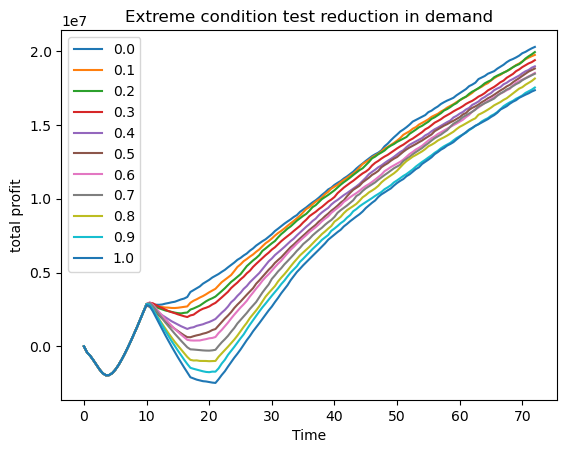

In [57]:
import matplotlib.pyplot as plt

ext_var = np.arange(0, 11)/10

for val in ext_var:
    parameter_vals['"%reduction of demand"'] = val
    print(parameter_vals)
    result = model.run(params=parameter_vals, return_columns=['total profit'])
    result = result.rename_axis('time')
    plt.plot(result.index, result.iloc[:, 0], label=val)
# Plot the data


# Customize the plot if needed
plt.xlabel('Time')
plt.ylabel('total profit')
plt.title('Extreme condition test reduction in demand')

# Display the plot
# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

In [ ]:
calculate_profit_index(result)